In [301]:
# Import all applicable python libraries, and then begin data cleaning

In [302]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [303]:
df = pd.read_csv('/Users/yuchenzhang/Desktop/MBAN 6110/Assignment 1/sales_data (1).csv')

In [304]:
df

,Product,Region,Price,Units Sold,Sale Date
0,NaN,Region_1,72.87,10.0,2022-01-01
1,Product_40,Region_2,46.19,10.0,2022-01-02
2,Product_1,Region_5,NaN,4.0,2022-01-03
3,Product_6,Region_8,143.47,8.0,2022-01-04
4,Product_44,Region_4,122.54,10.0,2022-01-05
...,...,...,...,...,...
1045,Product_42,Region_3,18.63,9.0,2023-07-10
1046,Product_4,Region_3,159.27,10.0,2024-07-14
1047,Product_43,Region_1,2.91,13.0,2023-08-17
1048,Product_27,Region_7,1.96,8.0,2024-03-10


In [305]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      942 non-null    object 
 2   Price       945 non-null    float64
 3   Units Sold  943 non-null    float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


<Axes: xlabel='Units Sold', ylabel='Count'>

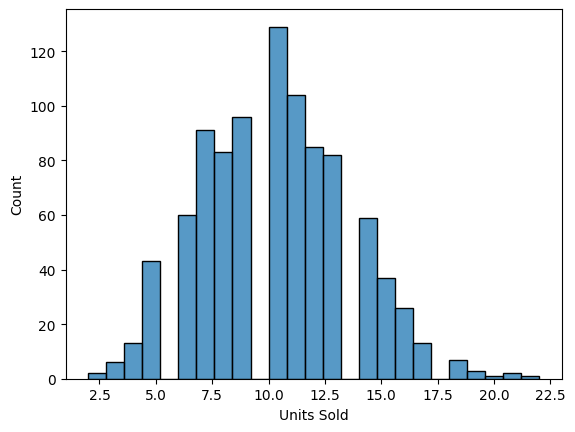

In [306]:
# Check for outlier by histplot
sns.histplot(df['Units Sold'])   # looks like normal distrbution, seems no outlier

In [307]:
# df.dropna(subset='Product',inplace=True)

In [308]:
# Data Cleaing
# Step 1

In [309]:
df['Price'] = df['Price'].fillna(df.groupby('Product')['Price'].transform('median'))


In [310]:
df['Units Sold'] = df['Units Sold'].fillna(df.groupby('Product')['Units Sold'].transform('median'))

In [311]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      942 non-null    object 
 2   Price       1039 non-null   float64
 3   Units Sold  1040 non-null   float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


In [312]:
# Step 2 
# drop all of the other missing value

In [313]:
# df['Product'] = df['Product'].fillna('Unkown')
# df['Region'] = df['Region'].fillna('Unkown')
# df['Units Sold'] = df['Units Sold'].fillna('Unkown')
# df['Price'] = df['Price'].fillna('Unkown')

In [314]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      942 non-null    object 
 2   Price       1039 non-null   float64
 3   Units Sold  1040 non-null   float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


In [315]:
df.dropna(subset=['Product', 'Region', 'Price', 'Units Sold'],inplace=True)

In [316]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 851 entries, 1 to 1048
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     851 non-null    object 
 1   Region      851 non-null    object 
 2   Price       851 non-null    float64
 3   Units Sold  851 non-null    float64
 4   Sale Date   851 non-null    object 
dtypes: float64(2), object(3)
memory usage: 39.9+ KB
